In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [9]:
df = pd.read_csv("mushroom_data.csv")
df.head()


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [11]:
df['class'].unique()

array(['p', 'e'], dtype=object)

Burada zehirli ve yenilebilir mantarları ikiye ayırmış olduk. Zehirli mantar: p, yenilebilir olanlar: e

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

Veri setimizi okuma ve inceleme işlemini yapmış olduk. Şimdi veri setimizde bulunan kategorik verileri sayısal verilere dönüştüreceğiz. Bunun için pandas kütüphanesi dummy variable ve scikit-learn kütüphanesindeki LabelEncoder tekniklerini kullanacağız.

In [13]:
X = df.drop(['class'],axis=1)
y = df['class']

Hedef değişken ve bağımlı değişkenimizi ayarladık. Y değişkenine LabelEncoder tekniği uygulayarak, X değişkenine de get_dummies fonksiyonu uygulayarak kategorik verilerimizi sayısal verilere dönüştüreceğiz.


In [15]:
X = pd.get_dummies(X)
X = X.astype(int)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


Zehirli (p): 1
Yenebilir(e): 0

Şimdi veri setimizi eğitim ve test kümelerine ayıracağız. Bunun için scikit-learn kütüphanesinin model_selection modülünden yararlanacağız.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
X_train.shape , X_test.shape

((6499, 116), (1625, 116))

In [22]:
y_train.shape , y_test.shape

((6499,), (1625,))

Karar Ağacı modelini oluşturalım.

In [26]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

[Text(0.5625, 0.9166666666666666, 'x[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(0.3125, 0.75, 'x[52] <= 0.5\ngini = 0.288\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.1875, 0.5833333333333334, 'x[54] <= 0.5\ngini = 0.135\nsamples = 3229\nvalue = [236, 2993]'),
 Text(0.125, 0.4166666666666667, 'x[34] <= 0.5\ngini = 0.055\nsamples = 3080\nvalue = [87, 2993]'),
 Text(0.0625, 0.25, 'gini = 0.0\nsamples = 2922\nvalue = [0, 2922]'),
 Text(0.1875, 0.25, 'x[20] <= 0.5\ngini = 0.495\nsamples = 158\nvalue = [87, 71]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 71\nvalue = [0, 71]'),
 Text(0.25, 0.4166666666666667, 'gini = 0.0\nsamples = 149\nvalue = [149, 0]'),
 Text(0.4375, 0.5833333333333334, 'x[56] <= 0.5\ngini = 0.13\nsamples = 431\nvalue = [401, 30]'),
 Text(0.375, 0.4166666666666667, 'gini = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.5, 0.4166666666666667, 'gin

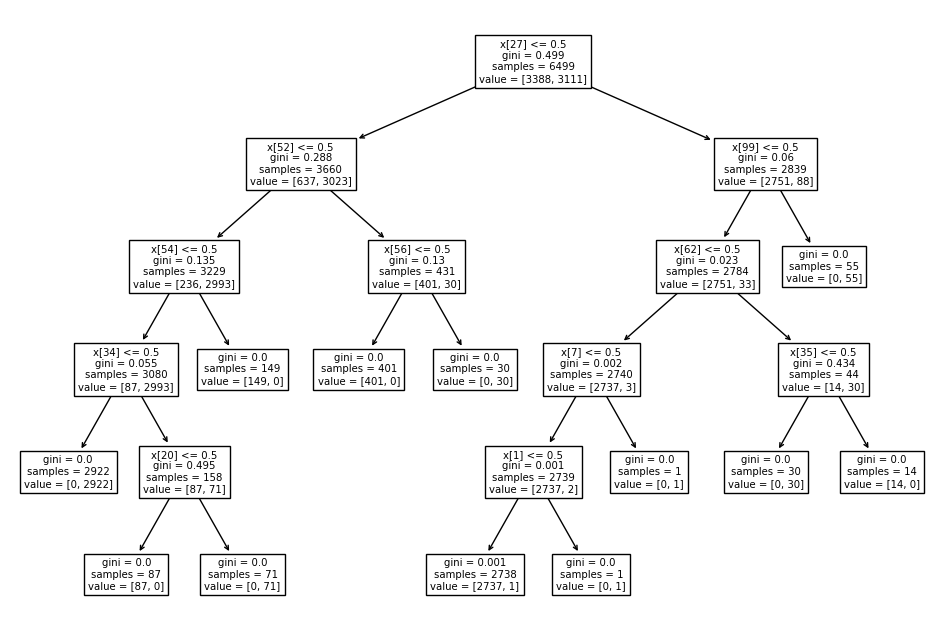

In [27]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [28]:
y_pred_gini = clf_gini.predict(X_test)

In [29]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 1, ..., 1, 0, 1])

Modelin ve eğitim setinin doğruluk puanını belirleyelim.

In [30]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9988
Training-set accuracy score: 0.9998


In [33]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [36]:
cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[820   0]
 [  2 803]]


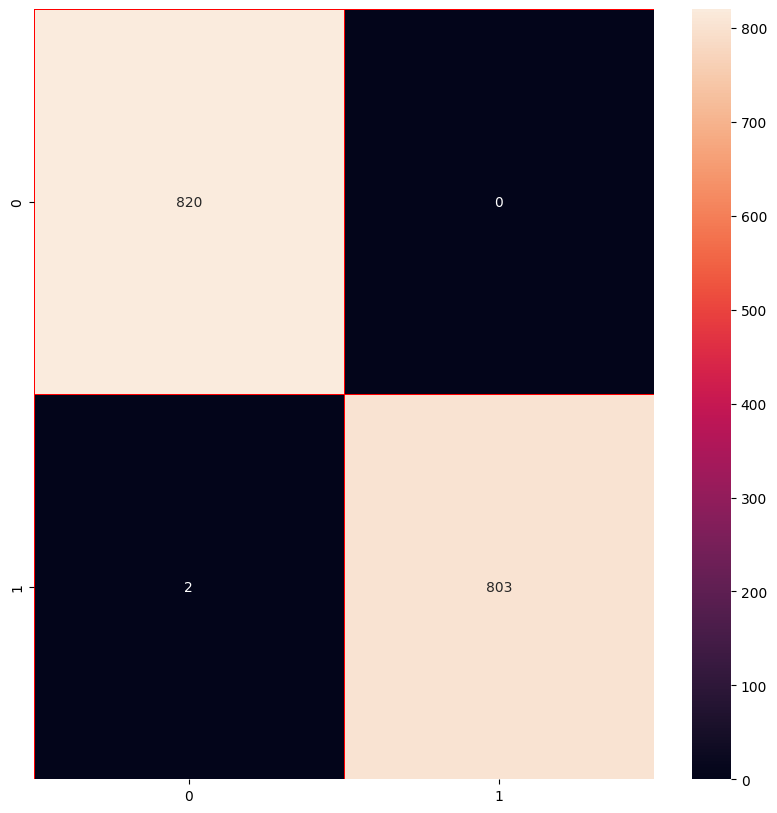

<Figure size 640x480 with 0 Axes>

In [37]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

In [38]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [39]:
f1_score = f1_score(y_test, y_pred_gini)
print("F1 Score:",f1_score)

F1 Score: 0.9987562189054726


F1 puanı 0.9987 oldukça yüksek bir değerdir. Bu, modelimizin sınıflandırma görevinde çok iyi performans gösterdiğini ve dengeli bir hassasiyet ve geri çağırma oranına sahip olduğunu gösterir. Yani, modelimizin sınıflandırma tahminlerinin hem doğru hem de eksiksiz olduğunu söyleyebiliriz.